In [37]:
import networkx as nx #for creating, analysis and visualization of graphs
from collections import Counter #occurances of items count
import matplotlib.pyplot as plt #graph plotting
import numpy as np #for numerical computations 

# WEEK 9

For week 9, we analyzed the social network of characters from the TV show "Friends" by representing interactions as a graph where nodes represent characters and edges represent their interactions. After constructing the original graph, we calculated various network metrics such as average degree, clustering coefficient, diameter, transitivity, and centrality measures. 
To generate a random graph that reflects the original structure, we used the preferential attachment (PA) model. This model was chosen because it naturally generates networks in which nodes with higher degrees are more likely to acquire new connections, reflecting a scale-free network, where nodes with higher degrees have a greater likelihood of receiving additional connections.
We compared the characteristics of the PA graph with those of the original graph, including degree distribution, clustering coefficient, and transitivity, and found that the PA model provides a realistic and meaningful representation of how relationships in the network evolve.

In [38]:
file_path = 'friends_episodes.txt' # path to the file

interactions = [] # empty list to store character interactions as tuples
with open(file_path,'r') as file:
    for line in file:
        line = line.strip() # removes whitespaces from each line
        if line.startswith('#'):# skips comments
            continue
        characters = line.split()# splits each line into a list of characters that are participating in the interaction
        if len(characters) ==2:# makes sure that there are exactly 2 people interacting 
            interactions.append(tuple(characters))# turnes each pair of characters into a tuple and adds it to the interactions list
interaction_counts = Counter(interactions)# counts how many times each interaction appears and stores it 

#graph creation (undirected graph)
friends_graph = nx.Graph()# creates empty undirected graph
for (char1, char2), weight in interaction_counts.items():# iterates through each character pair and their respective interaction count(weight)
    friends_graph.add_edge(char1,char2, weight=weight)# adds the edge between 2 nodes with specified weight(interaction count)

Calculations for avg.degree, clustering coefficient, diameter, global transitivity, avd.distance, centrality measures of the graph:

In [39]:
#takes the mean of the degrees of all nodes and then calculates the average degree of the graph
average_degree = np.mean([degree for _, degree in friends_graph.degree()])

#calculates avg clustering coeff for the graph with weight consideration
clustering_coeff = nx.average_clustering(friends_graph, weight ='weight')

#calculation of diameter
diameter = nx.diameter(nx.Graph(friends_graph))

#list of all node degrees
degree_sequence =[degree for _, degree in friends_graph.degree()]

#global transitivity (summary measure of clustering in the entire network)
transitivity= nx.transitivity(friends_graph)

#reference point to calculate distances, "Joey" is the most central one, so we chose him
reference_node='Joey'

if reference_node in friends_graph:#checks if reference node exists
    avg_distance_from_node = np.mean([nx.shortest_path_length(friends_graph, source=reference_node, target=node)
                                      for node in friends_graph.nodes if node!= reference_node])
    #average shortest path from Joey to all other nodes (excluding itself)
else:
    avg_distance_from_node = None #if the reference node is not found, just gives None
    
#centrality measures 
degree_centrality = nx.degree_centrality(friends_graph)#computes degree centrality for each node
closeness_centrality = nx.closeness_centrality(friends_graph)#calculates closeness centrality
betweenness_centrality = nx.betweenness_centrality(friends_graph) #betweenness centrality

Showcasing the calculation results (excluding centrality measures, which will be used later):

In [40]:
#Graph metrics are as follows:
print(f"Original Graph Metrics:")
print(f"Original Graph Average Degree: {average_degree:.2f}")
print(f"Original Graph Average Clustering Coefficient: {clustering_coeff:.2f}")
print(f"Original Graph Diameter: {diameter}")
print(f"Original Graph Transitivity: {transitivity:.2f}")
if avg_distance_from_node is not None:
    print(f"Original Graph Average Distance from Node '{reference_node}': {avg_distance_from_node:.2f}")
else:
    print(f"Node '{reference_node}' not found in the graph")

Original Graph Metrics:
Original Graph Average Degree: 4.31
Original Graph Average Clustering Coefficient: 0.01
Original Graph Diameter: 5
Original Graph Transitivity: 0.03
Original Graph Average Distance from Node 'Joey': 1.66


Creating a random graph by implementing the Preferential Attachment: 

In [41]:
num_nodes = friends_graph.number_of_nodes()#number of nodes in the original graph
num_edges = friends_graph.number_of_edges()#number of edges in original graph
average_degree = 2*num_edges / num_nodes #formula for avg degree

preferential_graph = nx.barabasi_albert_graph(n=num_nodes,m=int(average_degree / 2))
#creates a Preferential Attachment random graph with nodes and avg degree, it matches the original

Calculations for avg.degree, clustering coefficient, diameter, global transitivity, avd.distance, centrality measures of the newly created random graph:

In [47]:
#applied functions are the same as we the ones used for original graph:

pref_clustering_coeff = nx.average_clustering(preferential_graph)
pref_diameter = nx.diameter(preferential_graph)
pref_degree_sequence = [degree for _, degree in preferential_graph.degree()]
pref_transitivity = nx.transitivity(preferential_graph)
pref_degree_centrality = nx.degree_centrality(preferential_graph)
pref_closeness_centrality = nx.closeness_centrality(preferential_graph)
pref_betweenness_centrality = nx.betweenness_centrality(preferential_graph) #betweenness centrality

Showcasing the calculation results (excluding centrality measures, which will be used later) for newly created PA random graph:

In [48]:
#Graph metrics for newly created PA random graph are as follows:
print(f"Preferencial Attachment Graph Metrics: ")
print(f"Preferential Attachment Graph Average Degree: {average_degree:.2f}")
print(f"Preferential Attachment Graph Average Clustering Coefficient: {pref_clustering_coeff:.2f}")
print(f"Preferential Attachment Graph Diameter: {pref_diameter}")
print(f"Preferential Attachment Graph Transitivity: {pref_transitivity:.2f}")

Preferencial Attachment Graph Metrics: 
Preferential Attachment Graph Average Degree: 4.31
Preferential Attachment Graph Average Clustering Coefficient: 0.03
Preferential Attachment Graph Diameter: 7
Preferential Attachment Graph Transitivity: 0.01


Comparing the Original Graph and (PA) Random Graph: 

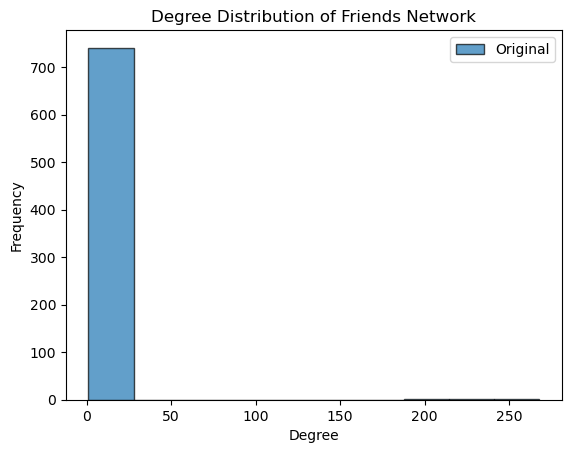

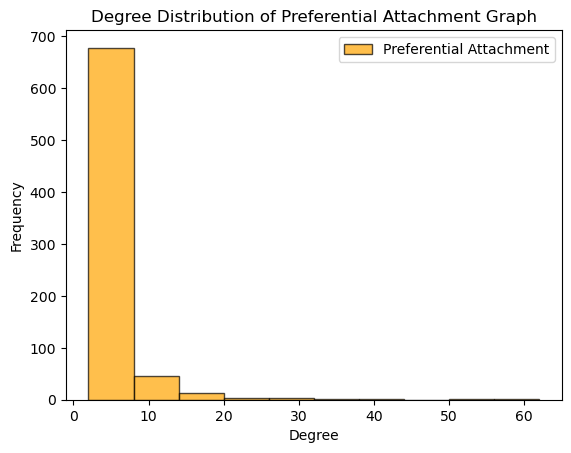

In [49]:
# Plot degree distribution for the original graph
plt.hist(degree_sequence, bins=10, edgecolor='black', alpha=0.7, label='Original')
plt.title("Degree Distribution of Friends Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot degree distribution for preferential attachment graph
plt.hist(pref_degree_sequence, bins=10, edgecolor='black', alpha=0.7, color='orange', label='Preferential Attachment')
plt.title("Degree Distribution of Preferential Attachment Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [50]:
#Comparison of characteristics
print("Comparison of Chararacteristics: ")
print(f"Average Clustering Coefficient: for Original Graph: {clustering_coeff:.2f} for Preferential Attachment Graph:{pref_clustering_coeff:.2f} ")
print(f"Diameter: for Original Graph: {diameter} Preferential Attachment Graph:{pref_diameter}")
print(f"Transitivity: for Original Graph={transitivity:.2f} Preferential Attachment Graph:{pref_transitivity:.2f}")

Comparison of Chararacteristics: 
Average Clustering Coefficient: for Original Graph: 0.01 for Preferential Attachment Graph:0.03 
Diameter: for Original Graph: 5 Preferential Attachment Graph:7
Transitivity: for Original Graph=0.03 Preferential Attachment Graph:0.01


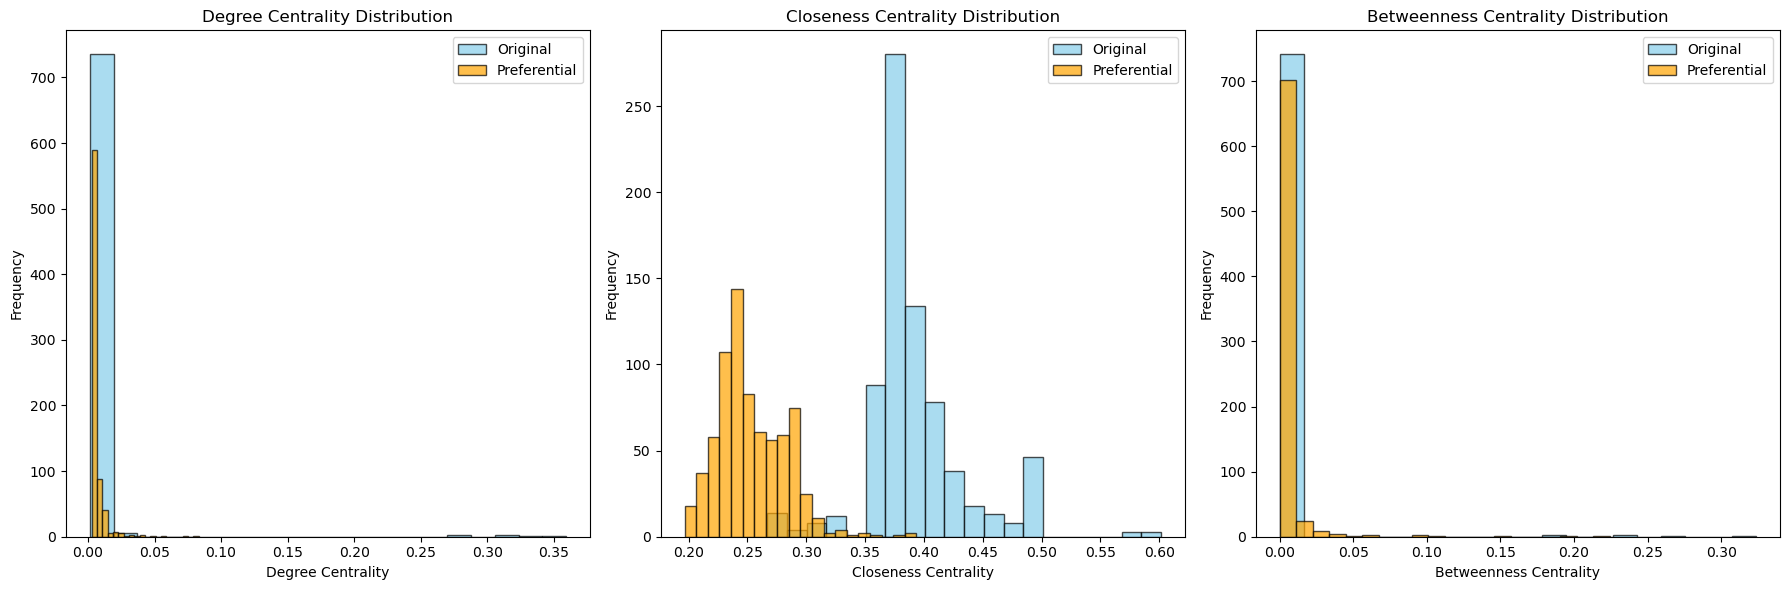

In [53]:
# Plot Degree Centrality Distribution
plt.figure(figsize=(18, 6)) #creats a figure with defined size

# Degree Centrality
plt.subplot(1, 3, 1) # first subplot (1 row, 3 columns, 1st plot)
#plots for original graph:
plt.hist(list(degree_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Original', color='skyblue')
#plots for PA graph:
plt.hist(list(pref_degree_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Preferential', color='orange')
plt.title("Degree Centrality Distribution") #adds a title 
plt.xlabel("Degree Centrality") #labels the x-axis
plt.ylabel("Frequency") #labels the y-axis
plt.legend()

# Closeness Centrality
plt.subplot(1, 3, 2) # first subplot (1 row, 3 columns, 2nd plot)
#plots for original graph:
plt.hist(list(closeness_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Original', color='skyblue')
#plots for PA graph:
plt.hist(list(pref_closeness_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Preferential', color='orange')
plt.title("Closeness Centrality Distribution") #adds a title 
plt.xlabel("Closeness Centrality") #labels the x-axis
plt.ylabel("Frequency") #labels the y-axis
plt.legend()

# Betweenness Centrality
plt.subplot(1, 3, 3) # first subplot (1 row, 3 columns, 3rd plot)
#plots for original graph
plt.hist(list(betweenness_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Original', color='skyblue')
#plots for PA graph:
plt.hist(list(pref_betweenness_centrality.values()), bins=20, edgecolor='black', alpha=0.7, label='Preferential', color='orange')
plt.title("Betweenness Centrality Distribution") #adds a title 
plt.xlabel("Betweenness Centrality") #labels the x-axis
plt.ylabel("Frequency") #labels the y-axis
plt.legend()

plt.tight_layout() # adjusts the layout so plots don't overlap
plt.show() #displays the plot 